## Preprocessing Data in Python for Machine Learning (Sleep In Mammals)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import seaborn as sns

### Step A

In [2]:
cols = ['Species', 'BodyWt', 'BrainWt', 'NonDreaming', 'Dreaming', 'TotalSleep',
        'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']
sleep_data = pd.read_csv('sleep.csv', names=cols)

In [3]:
sleep_data.shape

(60, 11)

In [4]:
sleep_data.dtypes

Species         object
BodyWt         float64
BrainWt        float64
NonDreaming    float64
Dreaming       float64
TotalSleep     float64
LifeSpan       float64
Gestation      float64
Predation        int64
Exposure         int64
Danger           int64
dtype: object

In [5]:
sleep_data.head() #30

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [6]:
sleep_data.tail() #30

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
55,Tenrec,0.900,2.6,11.0,2.3,13.3,4.5,60.0,2,1,2
56,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
57,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
58,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
59,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


In [7]:
sleep_data.describe()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
count,60.000000,60.000000,48.000000,48.000000,59.000000,56.000000,56.000000,60.000000,60.000000,60.000000
mean,196.532150,280.955333,8.672917,2.027083,10.423729,19.855357,139.616071,2.833333,2.400000,2.600000
std,912.904887,943.864566,3.666452,1.444688,4.643027,18.478665,144.647345,1.474836,1.585955,1.416609
min,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.532500,3.975000,6.250000,0.900000,7.300000,6.375000,34.500000,2.000000,1.000000,1.000000
50%,3.150000,16.500000,8.350000,1.800000,10.300000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,40.287500,160.000000,11.000000,2.600000,13.200000,27.250000,202.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


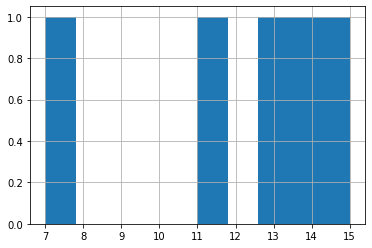

In [8]:
sleep_data['Predation'].value_counts().hist();

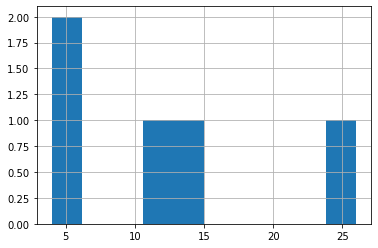

In [9]:
sleep_data['Exposure'].value_counts().hist();

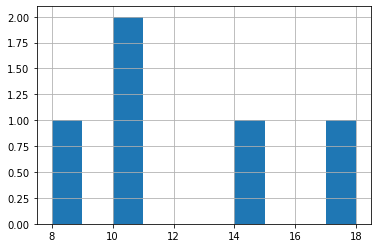

In [10]:
sleep_data['Danger'].value_counts().hist();

### Step B

In [11]:
sleep_corr = sleep_data.corr()
grps = ['NegStrong','NegMedium','Weak', 'PosMedium', 'PosStrong']
cols = ['BodyWt', 'BrainWt','NonDreaming', 'Dreaming', 'TotalSleep', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']
for col in cols:
    sleep_corr[col] = pd.cut(sleep_corr[col], (-1,-0.8,-0.6,0.6,0.8,1), labels=grps)
sleep_corr

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,PosStrong,PosStrong,Weak,Weak,Weak,Weak,PosMedium,Weak,Weak,Weak
BrainWt,PosStrong,PosStrong,Weak,Weak,Weak,Weak,PosMedium,Weak,Weak,Weak
NonDreaming,Weak,Weak,PosStrong,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak
Dreaming,Weak,Weak,Weak,PosStrong,PosMedium,Weak,Weak,Weak,Weak,Weak
TotalSleep,Weak,Weak,PosStrong,PosMedium,PosStrong,Weak,NegMedium,Weak,NegMedium,NegMedium
LifeSpan,Weak,Weak,Weak,Weak,Weak,PosStrong,PosMedium,Weak,Weak,Weak
Gestation,PosMedium,PosMedium,Weak,Weak,NegMedium,PosMedium,PosStrong,Weak,PosMedium,Weak
Predation,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,PosMedium,PosStrong
Exposure,Weak,Weak,Weak,Weak,NegMedium,Weak,PosMedium,PosMedium,PosStrong,PosMedium
Danger,Weak,Weak,Weak,Weak,NegMedium,Weak,Weak,PosStrong,PosMedium,PosStrong


### Step C

In [13]:
sleep_data.isnull().sum()

Species         0
BodyWt          0
BrainWt         0
NonDreaming    12
Dreaming       12
TotalSleep      1
LifeSpan        4
Gestation       4
Predation       0
Exposure        0
Danger          0
dtype: int64

In [14]:
sleep_data[sleep_data.isnull().any(axis=1)]

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
12,Deserthedgehog,0.550,2.4,7.6,2.7,10.3,NaN,NaN,2,1,2
13,Donkey,187.100,419.0,NaN,NaN,3.1,40.0,365.0,5,5,5
18,Genet,1.410,17.5,4.8,1.3,6.1,34.0,NaN,1,2,1
19,Giantarmadillo,60.000,81.0,12.0,6.1,18.1,7.0,NaN,1,1,1
22,Gorilla,207.000,406.0,NaN,NaN,12.0,39.3,252.0,1,4,1
24,Graywolf,36.330,119.5,NaN,NaN,13.0,16.2,63.0,1,1,1
28,Jaguar,100.000,157.0,NaN,NaN,10.8,22.4,100.0,1,1,1


In [15]:
sleep_data.loc[29,'NonDreaming'] = 8.6
sleep_data.loc[29,'Dreaming'] = 2.0
sleep_data.loc[29,'TotalSleep'] = 10.6

In [16]:
sleep_data.loc[3,'LifeSpan'] = sleep_data.loc[25,'LifeSpan']
sleep_data.loc[12,'LifeSpan'] = sleep_data.loc[16,'LifeSpan']
sleep_data.loc[12,'Gestation'] = sleep_data.loc[16,'Gestation']
sleep_data.loc[18,'Gestation'] = sleep_data.loc[8,'Gestation']
sleep_data.loc[19,'Gestation'] = sleep_data.loc[38,'Gestation']
sleep_data.loc[33,'LifeSpan'] = sleep_data.loc[46,'LifeSpan']
sleep_data.loc[54,'Gestation'] = sleep_data.loc[14,'Gestation']
sleep_data.loc[34,'LifeSpan'] = sleep_data.loc[45,'LifeSpan']

In [17]:
sleep_data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,9.0,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [18]:
sleep_data.tail()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
55,Tenrec,0.900,2.6,11.0,2.3,13.3,4.5,60.0,2,1,2
56,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
57,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
58,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
59,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


In [19]:
# Add a column for the proportion of Dreaming Sleep 
sleep_data['DreamProp'] = sleep_data['Dreaming'] / sleep_data['TotalSleep']

# Now, we are going to use binning (discretization) of the TotalSleep variable # Create 10 groups
groups = np.arange(10)

# Divide the TotalSleep values into these groups
sleep_data['TotSleepGrp'] = pd.cut(sleep_data['TotalSleep'], 10, labels=groups)

# Using these groups find the mean DreamProp for the total sleep group
dream_prop_mean = sleep_data.groupby(['TotSleepGrp'])['DreamProp'].mean()

# Use these means as groups for the DreamProp group
sleep_data['DreamPropGrp'] = pd.cut(sleep_data['TotalSleep'], 10, labels=dream_prop_mean)

# You can't do math with a category column So, create a float type column
sleep_data['DreamPropMean'] = sleep_data['DreamPropGrp'].astype('float')

# Use this new column to calculate the missing value in 'Dreaming' columns
sleep_data.loc[sleep_data['Dreaming'].isnull(), 'Dreaming'] = round (sleep_data['DreamPropMean'] * sleep_data['TotalSleep'], 1)
    
# Use the 'Dreaming' column to calculate the # missing value in 'NonDreaming' columns
sleep_data.loc[sleep_data['NonDreaming'].isnull(), 'NonDreaming'] = round(sleep_data['TotalSleep']
                                                                          - sleep_data['DreamPropMean'], 1)

In [19]:
sleep_data = sleep_data.drop(['DreamProp', 'TotSleepGrp', 'DreamPropGrp', 'DreamPropMean'],axis=1)

In [20]:
sleep_data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,3.1,0.8,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,12.4,1.7,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,16.3,3.4,16.5,9.0,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [21]:
sleep_data.tail()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
55,Tenrec,0.900,2.6,11.0,2.3,13.3,4.5,60.0,2,1,2
56,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
57,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
58,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
59,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


### Step D

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


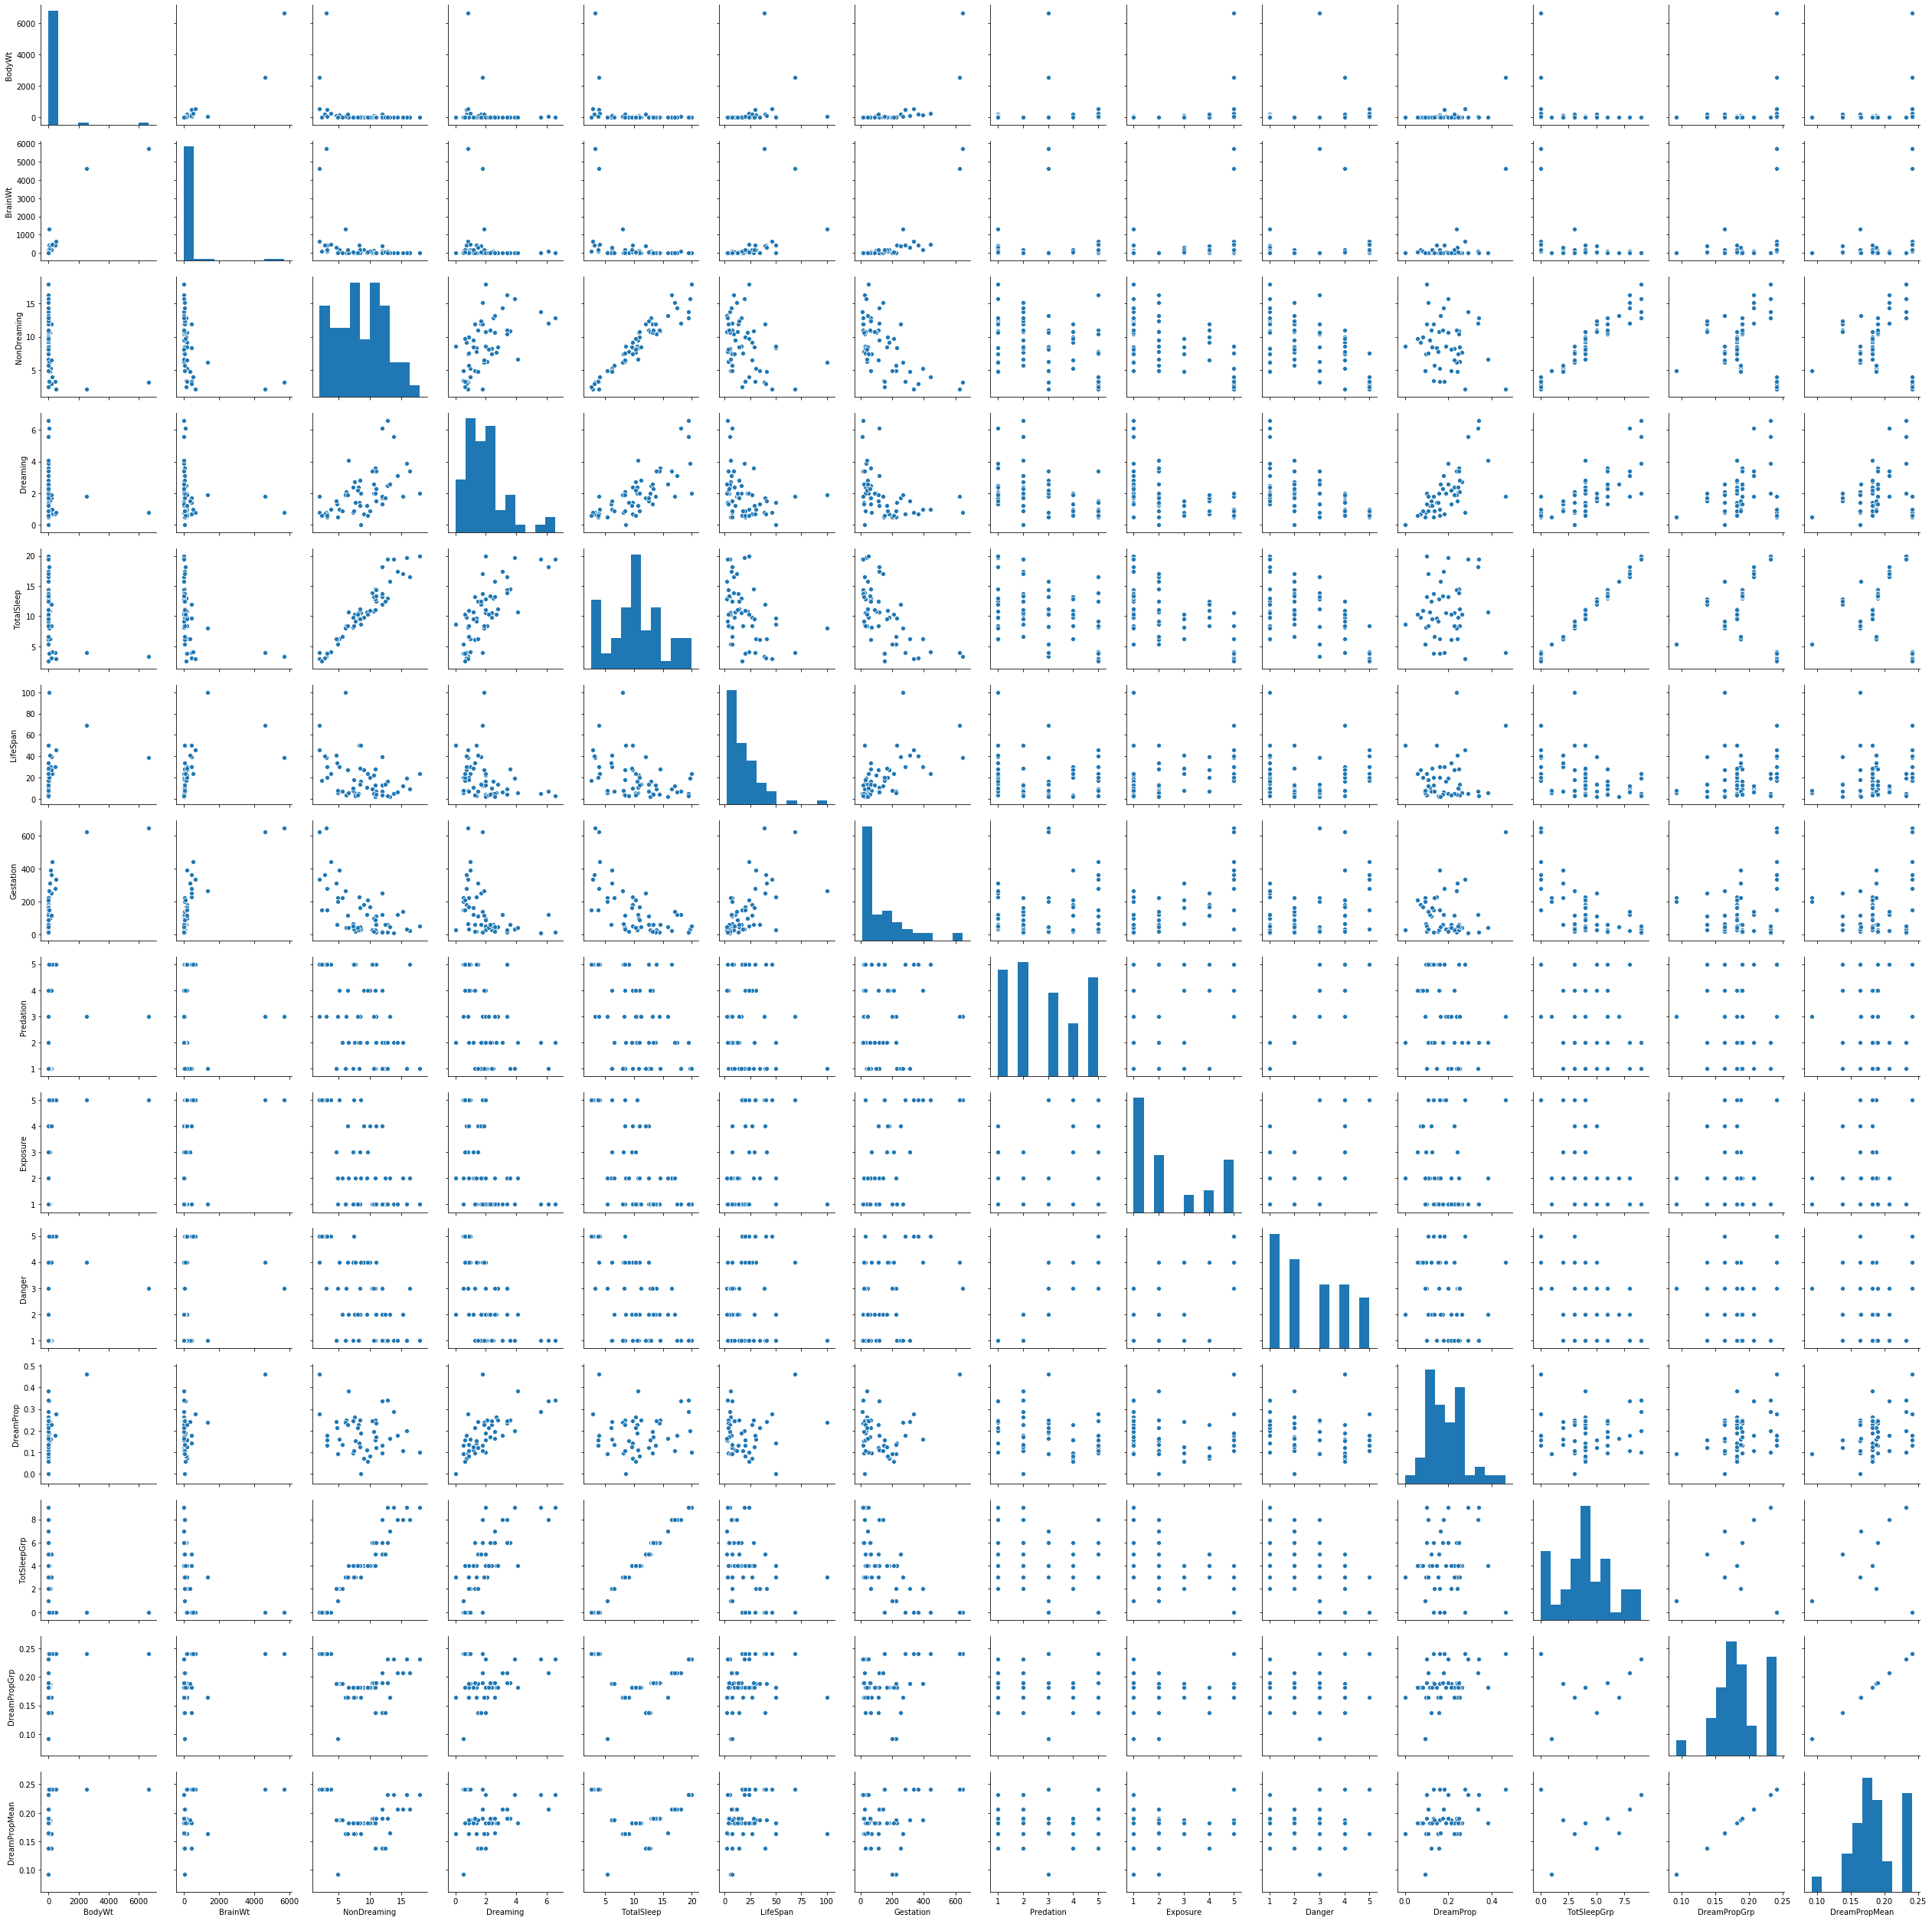

In [20]:
sns.pairplot(sleep_data);

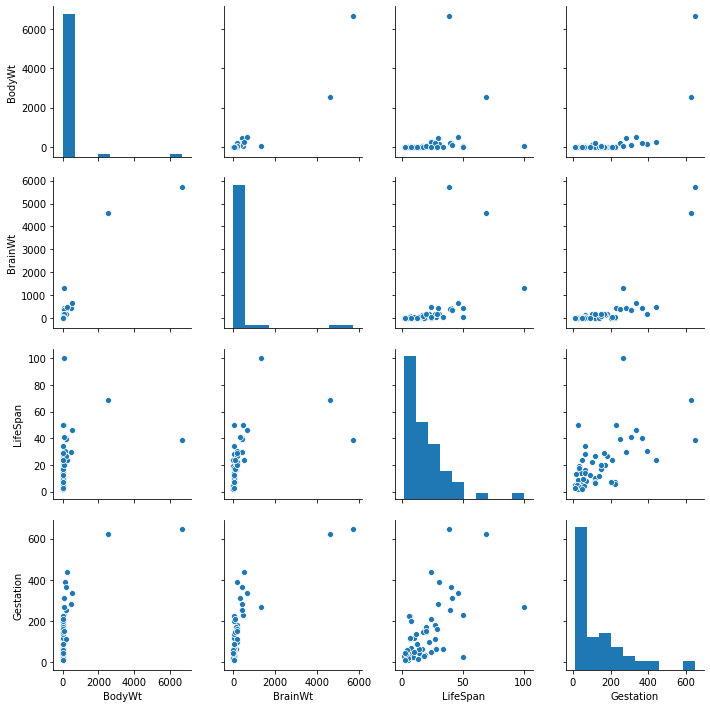

In [22]:
data1= sleep_data[['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation']]
sns.pairplot(data1);

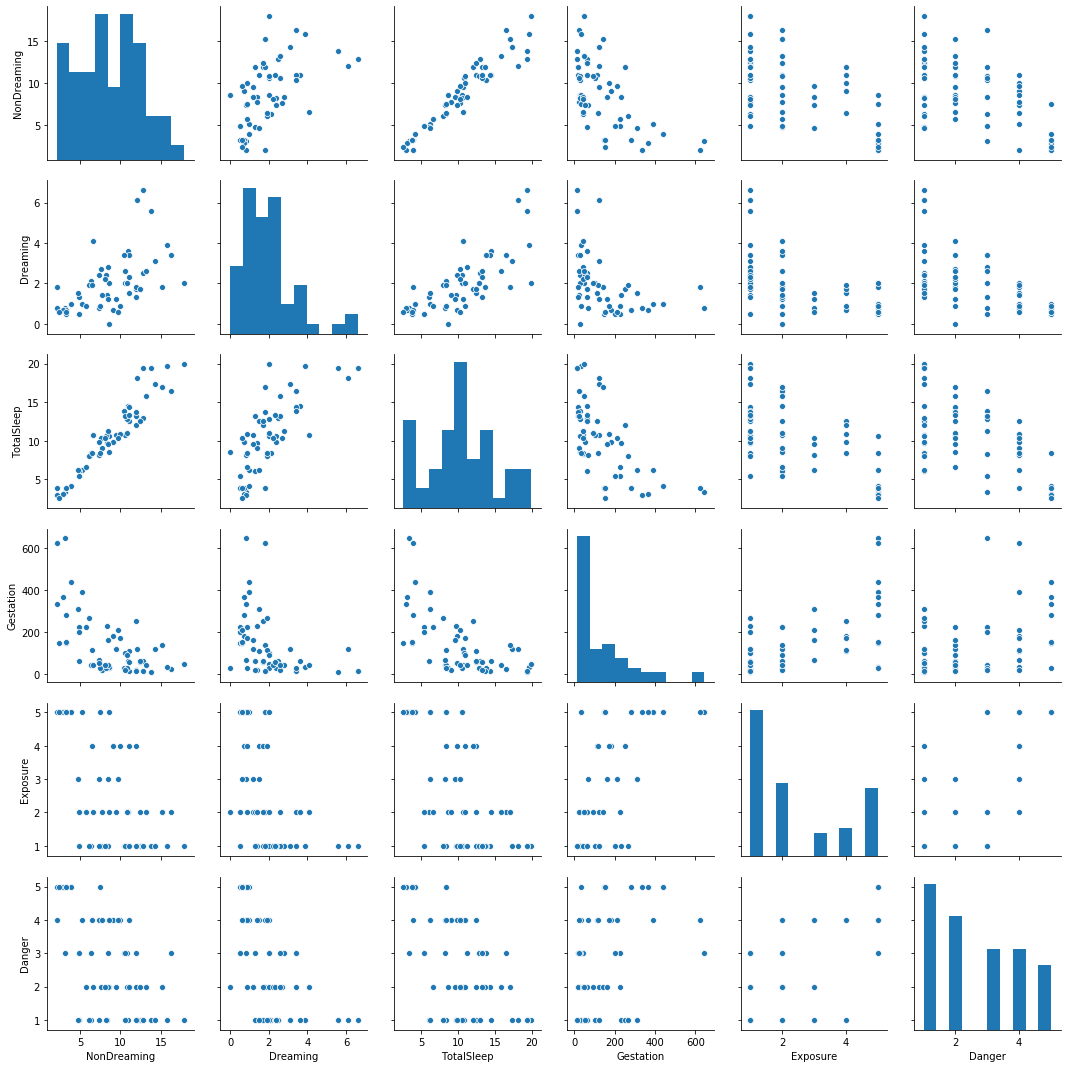

In [23]:
data2 = sleep_data[['NonDreaming', 'Dreaming', 'TotalSleep', 'Gestation', 'Exposure', 'Danger']]
sns.pairplot(data2);

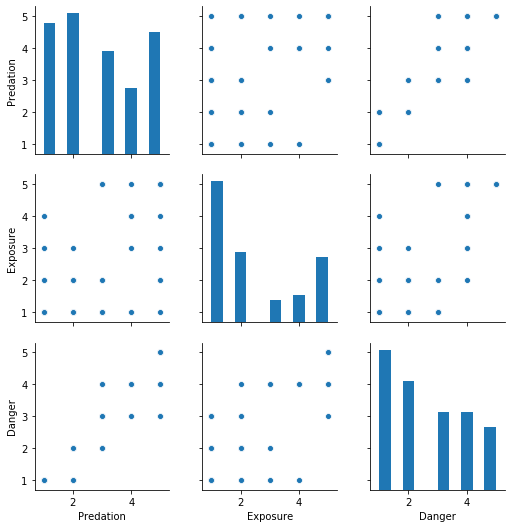

In [24]:
data3 = sleep_data[['Predation', 'Exposure', 'Danger']]
sns.pairplot(data3);